# 뉴럴네트워크 선형회귀(자동차 연비 데이터셋)

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [78]:
#!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/auto-mpg.csv

In [79]:
df = pd.read_csv('auto-mpg.csv')
df.shape

(398, 9)

In [80]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 2.정보 확인

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [82]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [83]:
df.loc[df['horsepower'] == '?', 'horsepower'] = np.nan

In [84]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [85]:
df['horsepower'] = df['horsepower'].astype('float')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [87]:
df = df.dropna()
df.shape

(392, 9)

## 3.데이터 분리

In [88]:
X = df.drop(['mpg', 'car name', 'model year'], axis=1)
y = df['mpg']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 6), (79, 6), (313,), (79,))

## 4.데이터 전처리

In [92]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
260,6,225.0,110.0,3620,18.7,1
184,4,140.0,92.0,2572,14.9,1
174,6,171.0,97.0,2984,14.5,1
64,8,318.0,150.0,4135,13.5,1
344,4,86.0,64.0,1875,16.4,1


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)

In [95]:
X_train_s

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
        -0.68982474],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.68982474],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.68982474],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, -0.1561399 ,  0.73076722,
        -0.68982474],
       [-0.87318372, -0.94128319, -1.0358895 , -0.72175802,  1.83265289,
        -0.68982474],
       [ 1.48290683,  1.97375578,  1.18793363,  2.39450014, -0.54884195,
        -0.68982474]])

In [96]:
y_train = y_train.to_numpy()

## 5.모델 만들기

In [97]:
X_train_s.shape

(313, 6)

In [98]:
from keras import layers

In [99]:
model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=2, activation='relu'),
    # 회귀는 출력에 활성화함수를 사용하지 않는다.
    layers.Dense(units=1)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

In [100]:
# 컴파일: 손실함수, 옵티마이저, 매트릭스
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse']
)

In [101]:
# 학습
EPOCHS = 300
BATCH_SIZE = 32

history = model.fit(
    X_train_s,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 590.9277 - mse: 590.9277 - val_loss: 684.3419 - val_mse: 684.3419
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 624.0668 - mse: 624.0668 - val_loss: 683.5955 - val_mse: 683.5955
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 623.0310 - mse: 623.0310 - val_loss: 682.8422 - val_mse: 682.8422
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 634.8036 - mse: 634.8036 - val_loss: 682.0758 - val_mse: 682.0758
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 608.7914 - mse: 608.7914 - val_loss: 681.2985 - val_mse: 681.2985
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 598.1292 - mse: 598.1292 - val_loss: 680.5047 - val_mse: 680.5047
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 577.8173 - mse: 577.8173 - val_loss: 679.6855 - val_mse: 679.6855
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 607.4554 - mse: 607.4554 - val_loss: 678.8583 - val_mse: 678.8583
Epoch 9/300
8/8

## 6.학습 곡선

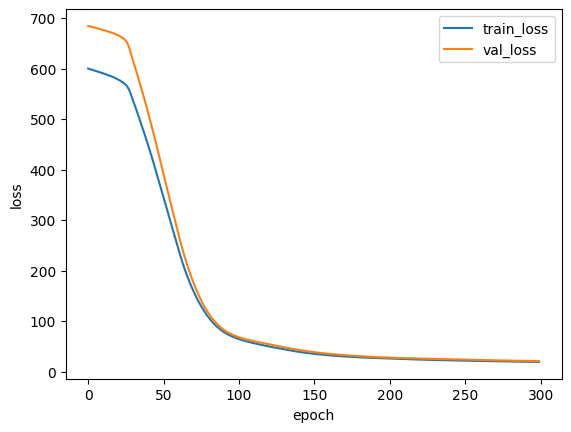

In [103]:
hist = history.history
epochs = history.epoch

plt.plot(epochs, hist['loss'], label='train_loss')
plt.plot(epochs, hist['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 7.테스트

In [104]:
X_test_s = ss.transform(X_test)
y_test = y_test.to_numpy()

In [106]:
y_pred = model.predict(X_test_s)
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[31.50725 ],
       [20.507929],
       [35.051414],
       [37.101868],
       [25.82977 ],
       [31.224958],
       [14.75473 ],
       [30.862688],
       [16.447031],
       [37.317146]], dtype=float32)

In [110]:
y_pred = y_pred.flatten()
y_pred[:10]

array([31.50725 , 20.507929, 35.051414, 37.101868, 25.82977 , 31.224958,
       14.75473 , 30.862688, 16.447031, 37.317146], dtype=float32)

In [111]:
y_test[:10]

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. ])

### 평가 지표

In [112]:
from sklearn.metrics import mean_squared_error

In [114]:
mse = mean_squared_error(y_test, y_pred)
mse

22.15271652711838